In [0]:
import sys
import time
import codecs
import pickle
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True)

In [0]:
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

###### Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "drive/My Drive/glove.6B.zip" "."

###### Download Embeddings

In [0]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

###### Extract Embeddings

In [0]:
import zipfile
with zipfile.ZipFile("glove.6B.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

###### Helper Function to Load Embeddings from File

In [0]:
def load_embeddings(file_name):
 
    with codecs.open(file_name, 'r', 'utf-8') as f_in:
        vocabulary, wv = zip(*[line.strip().split(' ', 1) for line in f_in])
    wv = np.loadtxt(wv)
    return wv, vocabulary

###### Load Embeddings

In [0]:
embedding_file = "glove.6B.50d.txt"

In [0]:
wv, vocabulary = load_embeddings(embedding_file)

###### Helper function to plot the Embeddings in 2D

In [0]:
!mkdir plots

In [0]:
def plot_embeddings(vocabulary, Y, filename, figsize=(4, 4)):
    plt.figure(figsize=figsize)
    plt.scatter(Y[:, 0], Y[:, 1], s=20)
    plt.axis('off')
    # for label, x, y in zip(vocabulary, Y[:, 0], Y[:, 1]):
    #     plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', size=2)
    plt.show()
    # plt.savefig("plots/" + filename, format='eps', dpi=1000)

### Applying Dimensionality Reduction

Let's apply dimensionality reduction on 1000 words subset of the vocabulary.

In [0]:
n_words = 1000
n_components = 2

#### T-SNE

In [46]:
tsne = TSNE(n_components=n_components, random_state=0)

start_time = time.time()
Y = tsne.fit_transform(wv[:n_words, :])
print(time.time() - start_time, "seconds")

6.382854461669922 seconds


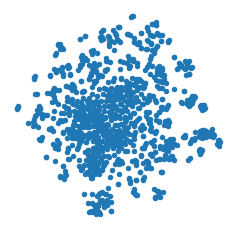

In [47]:
plot_embeddings(vocabulary, Y, "tsne_glove.eps")

#### UMAP

In [50]:
reducer = umap.UMAP(random_state=0)

start_time = time.time()
Y = reducer.fit_transform(wv[:n_words, :])
print(time.time() - start_time, "seconds")

2.609130382537842 seconds


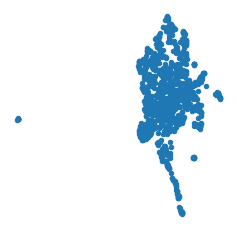

In [51]:
plot_embeddings(vocabulary, Y, "umap_glove.eps")

#### PCA

In [52]:
pca = PCA(n_components=n_components, random_state=0)

start_time = time.time()
Y = pca.fit_transform(wv[:n_words, :])
print(time.time() - start_time, "seconds")

0.03301048278808594 seconds


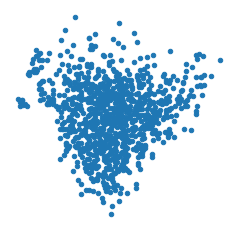

In [53]:
plot_embeddings(vocabulary, Y, "pca_glove.eps")

##### Truncated SVD

In [54]:
svd = TruncatedSVD(n_components=n_components)

start_time = time.time()
Y = svd.fit_transform(wv[:n_words, :])
print(time.time() - start_time, "seconds")

0.015110015869140625 seconds


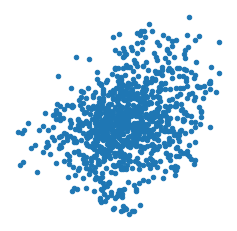

In [55]:
plot_embeddings(vocabulary, Y, "svd_glove.eps")

## Word2Vec Embedding

In [0]:
import gensim.downloader as api
from gensim.models import Word2Vec

###### Save Word2Vec model

In [0]:
# wv = api.load('word2vec-google-news-300')

# with open("word2vec.pkl", "wb") as f:
#     pickle.dump(wv, f)

# !cp "word2vec.pkl" "drive/My Drive/"

In [0]:
!cp "drive/My Drive/word2vec.pkl" "."

In [0]:
with open("word2vec.pkl", "rb") as f:
    wv = pickle.load(f)

In [28]:
wv.vectors.shape

(3000000, 300)

#### T-SNE

In [43]:
tsne = TSNE(n_components=n_components, random_state=0)

start_time = time.time()
Y = tsne.fit_transform(wv.vectors[:n_words, :])
print(time.time() - start_time, "seconds")

6.967061281204224 seconds


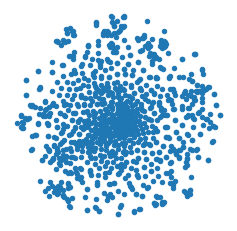

In [44]:
plot_embeddings(wv.vocab, Y, "tsne_w2v.eps")

#### UMAP

In [41]:
reducer = umap.UMAP()

start_time = time.time()
Y = reducer.fit_transform(wv.vectors[:n_words, :])
print(time.time() - start_time, "seconds")

2.783888816833496 seconds


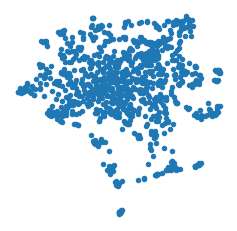

In [42]:
plot_embeddings(wv.vocab, Y, "umap_w2v.eps")

#### PCA

In [39]:
pca = PCA(n_components=n_components, random_state=0)

start_time = time.time()
Y = pca.fit_transform(wv.vectors[:n_words, :])
print(time.time() - start_time, "seconds")

0.032613515853881836 seconds


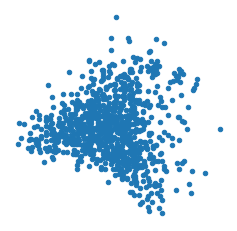

In [40]:
plot_embeddings(wv.vocab, Y, "pca_w2v.eps")

### Truncated SVD

In [35]:
svd = TruncatedSVD(n_components=n_components)

start_time = time.time()
Y = svd.fit_transform(wv.vectors[:n_words, :])
print(time.time() - start_time, "seconds")

0.04360389709472656 seconds


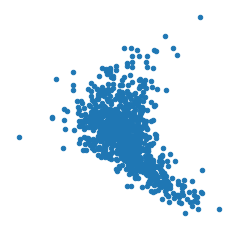

In [38]:
plot_embeddings(wv.vocab, Y, "svd_w2v.eps")